<a href="https://colab.research.google.com/github/cosmo3xplorer/BrainTumour_Detection/blob/main/Brain_Tumor_Classification_SMPL5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import torch
import keras
import os, gc, pathlib
from sklearn.metrics import confusion_matrix
from fastai import *
from fastai.vision.all import *
from fastai.tabular.all import *
from fastai.text.all import *
#from fastai.medical.imaging import *
from fastai.vision.data import ImageDataLoaders
from fastai.vision.models import *
import torchvision.models as models
from fastai.callback.schedule import lr_find
from fastai.callback.schedule import *
from matplotlib import pyplot as plt
from fastai.imports import *
from fastai.torch_core import *
from fastai.learner import *

In [4]:
print(os.listdir("/content/drive/MyDrive/Colab Notebooks/samples"))
DATA_DIR = "/content/drive/MyDrive/Colab Notebooks/samples/Brain_Tumor"
os.listdir(f'{DATA_DIR}')

['Brain_Tumor', 'no', 'yes', 'pred']


['no', 'yes']

In [5]:
data = ImageDataLoaders.from_folder(DATA_DIR, train=".", 
                                    valid_pct=0.2,
                                    ds_tfms=aug_transforms(mult=1.0, do_flip=True, flip_vert=True, 
                                    max_warp=0, max_rotate=10.0, 
                                    max_zoom=1.1, max_lighting=0.2,
                                    p_affine=0.75, mode='bilinear',
                                    pad_mode='reflection',
                                    align_corners=True, min_scale=1.0),
                                    item_tfms=Resize(224),
                                    bs=64,
                                    val_bs=None,
                                    num_workers=0,
                                    batch_tfms=Normalize.from_stats(*imagenet_stats))

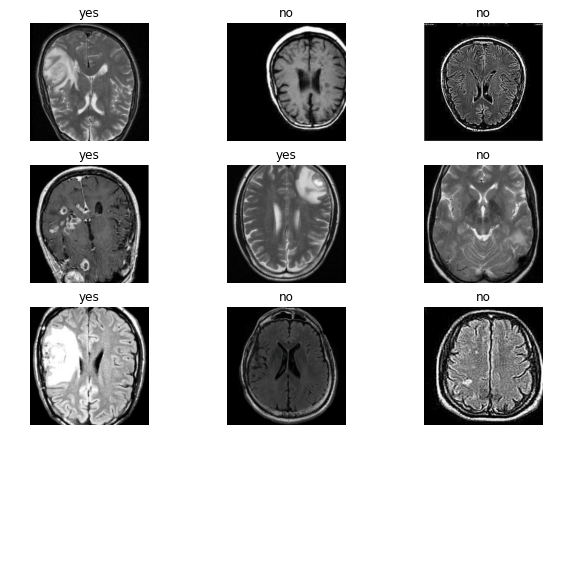

In [6]:
data.show_batch(nrows=4, figsize=(10,10))

In [7]:
learner = cnn_learner(data, models.resnet50, metrics=[accuracy, error_rate], cbs=[ShowGraphCallback()], model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


SuggestedLRs(valley=0.0008317637839354575)

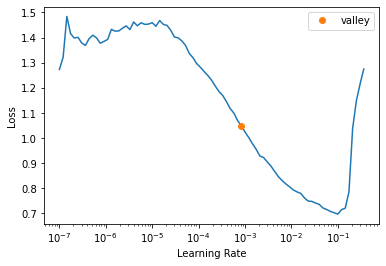

In [8]:
learner.lr_find()

In [9]:
learner.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.612750,0.219379,0.928333,0.071667,02:45
1,0.330247,0.141657,0.948333,0.051667,00:39
2,0.213088,0.118843,0.965000,0.035000,00:39
3,0.141180,0.062062,0.973333,0.026667,00:39
4,0.091052,0.059339,0.978333,0.021667,00:39
5,0.066877,0.053639,0.976667,0.023333,00:39


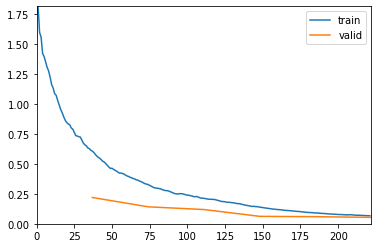

In [10]:
learner.fit_one_cycle(6, lr_max=slice(8.32e-4), cbs=[ShowGraphCallback()])

In [11]:
learner.export("/content/drive/MyDrive/Colab Notebooks/pretrained_model/resnet/btc2.pkl")

In [12]:
learner.unfreeze()

SuggestedLRs(valley=5.754399353463668e-06)

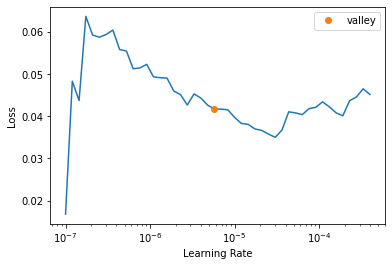

In [13]:
learner.lr_find()

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.028470,0.043472,0.983333,0.016667,00:48
1,0.042914,0.042952,0.983333,0.016667,00:47
2,0.034120,0.042004,0.985000,0.015000,00:47
3,0.030364,0.041643,0.985000,0.015000,00:47
4,0.030238,0.043898,0.985000,0.015000,00:47
5,0.034499,0.043648,0.983333,0.016667,00:47


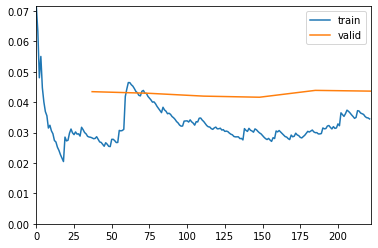

In [16]:
learner.fit_one_cycle(6, lr_max=slice(5.754399353463668e-6), cbs=[ShowGraphCallback()])

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.018151,0.029560,0.988333,0.011667,00:47
1,0.017616,0.030420,0.986667,0.013333,00:47
2,0.012790,0.030703,0.983333,0.016667,00:47
3,0.012542,0.029338,0.990000,0.010000,00:47


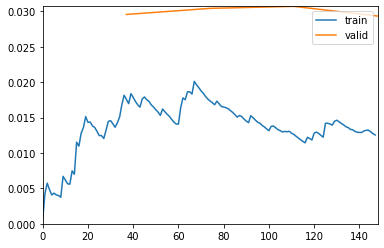

In [20]:
learner.fit_one_cycle(4, lr_max=slice(2.7e-5), cbs=[ShowGraphCallback()])

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.006359,0.029597,0.986667,0.013333,00:47
1,0.004922,0.019846,0.993333,0.006667,00:47
2,0.003799,0.019389,0.990000,0.010000,00:47
3,0.002778,0.020989,0.990000,0.010000,00:46


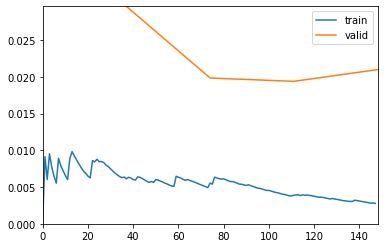

In [31]:
learner.fit_one_cycle(4, lr_max=slice(2.9e-5), cbs=[ShowGraphCallback()])

In [32]:
learner.export("/content/drive/MyDrive/Colab Notebooks/pretrained_model/resnet/final_resnet/btc_final2.pkl")

In [33]:
interp = ClassificationInterpretation.from_learner(learner)

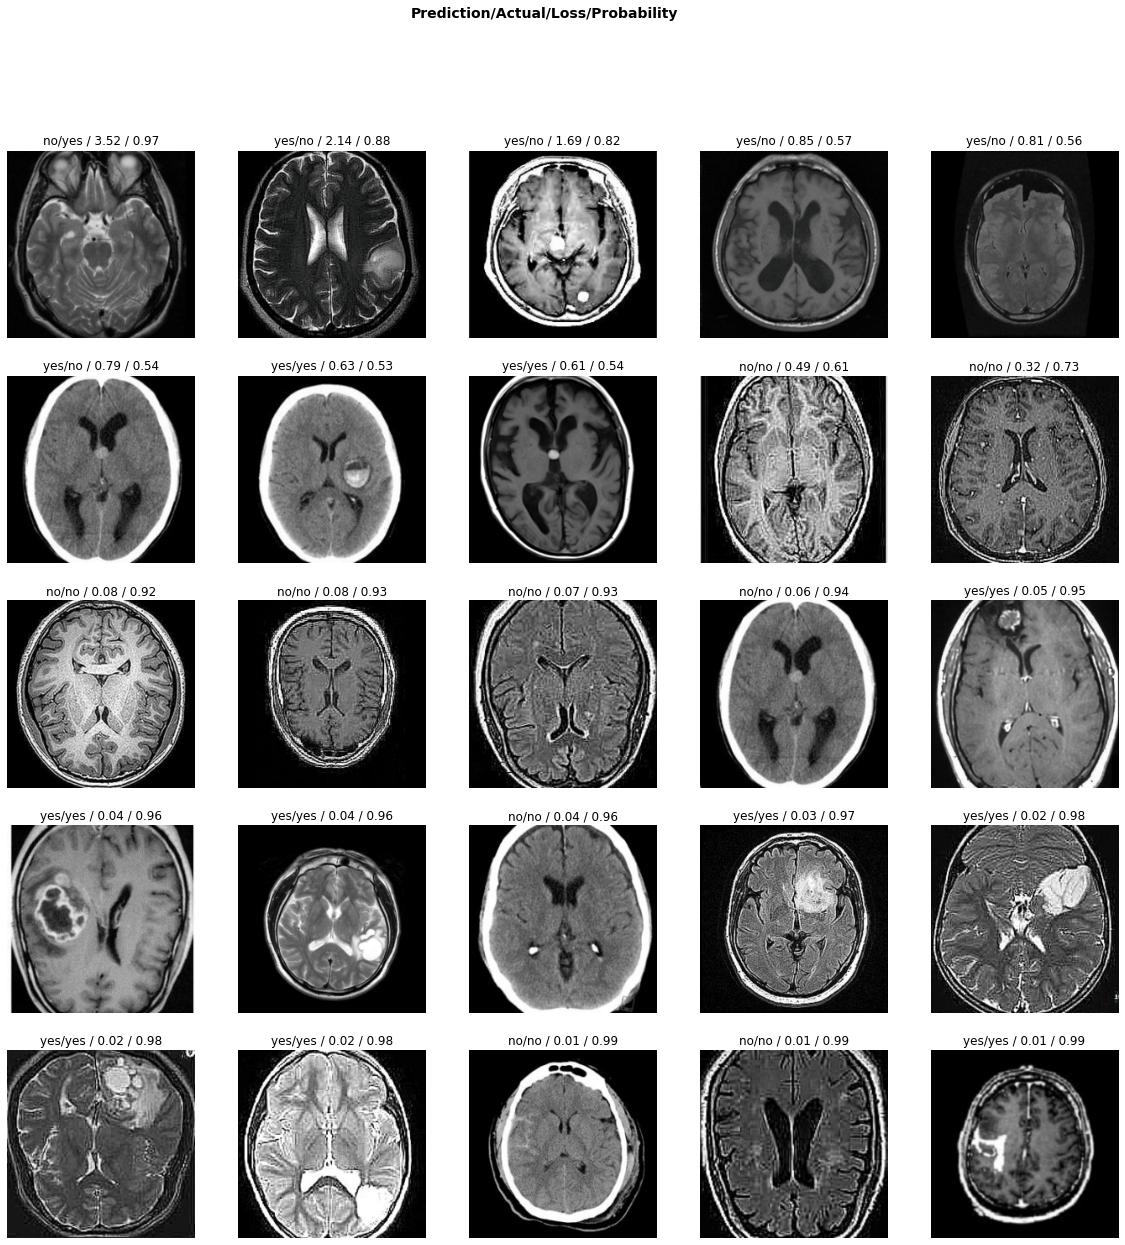

In [34]:
interp.plot_top_losses(25, figsize=(20,20))

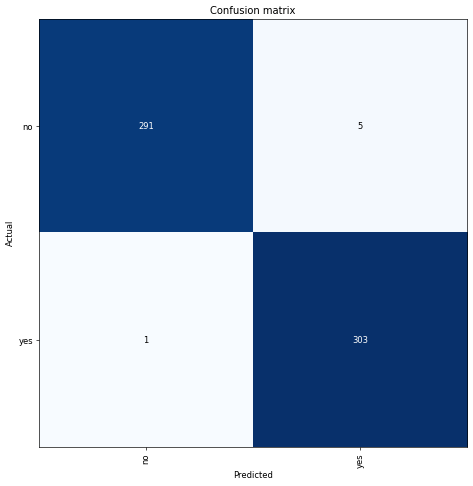

In [35]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)